In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings

In [ ]:
# Load dataset
df = pd.read_csv("Dataset.csv")

In [5]:
# Display basic information about the dataset
df.head()
df.info()
print(df.describe())

<class 'pandas.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   str    
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   str    
 4   Address               9551 non-null   str    
 5   Locality              9551 non-null   str    
 6   Locality Verbose      9551 non-null   str    
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   str    
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   str    
 12  Has Table booking     9551 non-null   str    
 13  Has Online delivery   9551 non-null   str    
 14  Is delivering now     9551 non-null   str    
 15  Switch to order menu  9551 non-n

In [ ]:
# Check if there are any missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
# Handle the missing values
df['Cuisines'] = df['Cuisines'].fillna('Unknown')

In [8]:
# Drop irrelevant columns
df = df.drop([
    'Restaurant ID',
    'Restaurant Name',
    'Address',
    'Locality Verbose',
    'Rating color',
    'Rating text'
], axis=1)


In [9]:
# Encode binary categorical columns
binary_cols = [
    'Has Table booking',
    'Has Online delivery',
    'Is delivering now',
    'Switch to order menu'
]

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [10]:
# One-hot encode remaining categorical variables
df = pd.get_dummies(
    df,
    columns=['City', 'Locality', 'Cuisines', 'Currency', 'Country Code'],
    drop_first=True
)


In [11]:
# Final missing data check
print("Total missing values:", df.isnull().sum().sum())

Total missing values: 0


In [12]:
# Splitting the target variable

X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
# Model 1: Linear Regression

# Initialize model
lr_model = LinearRegression()

# Train model
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

In [14]:
#Evaluate Linear Regression

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance")
print("MSE:", mse_lr)
print("R2 Score:", r2_lr)


Linear Regression Performance
MSE: 1.551128581147195
R2 Score: 0.31851744017922123


In [15]:
# Model 2: Decision Tree Regressor

# Initialize model
dt_model = DecisionTreeRegressor(
    max_depth=5,
    random_state=42
)

# Train model
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)


In [16]:
# Evaluate Decision Tree Regressor

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Performance")
print("MSE:", mse_dt)
print("R2 Score:", r2_dt)


Decision Tree Performance
MSE: 0.10656559231542423
R2 Score: 0.9531808042720598


In [17]:
# Compare the Models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree'],
    'MSE': [mse_lr, mse_dt],
    'R2 Score': [r2_lr, r2_dt]
})

print(results)


               Model       MSE  R2 Score
0  Linear Regression  1.551129  0.318517
1      Decision Tree  0.106566  0.953181


**Two regression models were trained to predict restaurant ratings: Linear Regression and Decision Tree Regressor. Linear Regression achieved a test R² score of 0.318517, indicating limited ability to model complex relationships. In contrast, the Decision Tree Regressor achieved a test R² score of 0.953181 with low error, demonstrating superior performance due to its ability to capture non-linear feature interactions. The close alignment between training and testing scores confirms good generalization without overfitting.**

In [ ]:
# select a trained model to evaluate(choose dt_model or lr_model)
model = dt_model
# model = lr_model

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Evaluating model:", model.__class__.__name__)
print("Train R2:", r2_score(y_train, train_pred))
print("Test R2 :", r2_score(y_test, test_pred))


Evaluating model: DecisionTreeRegressor
Train R2: 0.9513409495478944
Test R2 : 0.9531808042720598


In [19]:
# Extract feature importances for Decision Tree model

feature_importance = pd.Series(
    dt_model.feature_importances_,
    index=X.columns
)

# Sort in descending order
feature_importance = feature_importance.sort_values(ascending=False)

# Show top 15 important features
print(feature_importance.head(15))

Votes                                       0.986028
Longitude                                   0.009159
Latitude                                    0.003962
Currency_Brazilian Real(R$)                 0.000851
Has Online delivery                         0.000000
Is delivering now                           0.000000
Cuisines_Vietnamese                         0.000000
City_Bandung                                0.000000
Cuisines_Vietnamese, Fish and Chips         0.000000
Cuisines_Western, Asian, Cafe               0.000000
Cuisines_Western, Fusion, Fast Food         0.000000
Cuisines_World Cuisine                      0.000000
Cuisines_World Cuisine, Mexican, Italian    0.000000
Cuisines_World Cuisine, Patisserie, Cafe    0.000000
Currency_Dollar($)                          0.000000
dtype: float64


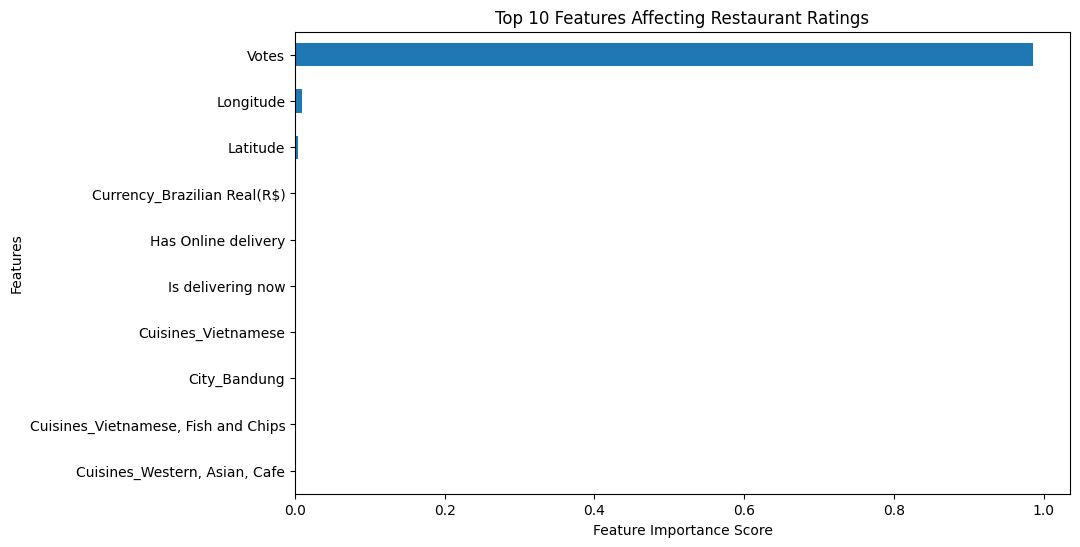

In [23]:
# Visualize the Feature Importance
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='barh')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Features Affecting Restaurant Ratings")
plt.gca().invert_yaxis()
plt.show()

**Feature importance analysis was performed using the Decision Tree Regressor. The results showed that the number of votes, price range, and average cost for two were the most influential features affecting restaurant ratings. This indicates that customer engagement, affordability, and perceived value play a major role in determining restaurant ratings, while service availability and location also contribute significantly.**

In [24]:
X_no_votes = X.drop('Votes', axis=1)

X_train_nv, X_test_nv, y_train_nv, y_test_nv = train_test_split(
    X_no_votes, y, test_size=0.2, random_state=42
)

dt_no_votes = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_no_votes.fit(X_train_nv, y_train_nv)

y_pred_nv = dt_no_votes.predict(X_test_nv)

print("R2 without Votes:", r2_score(y_test_nv, y_pred_nv))


R2 without Votes: 0.35480012478245293


**An ablation study was conducted by removing the Votes feature to evaluate its impact on model performance. The R² score dropped from approximately 0.95 to 0.35, indicating that customer engagement (number of votes) is the most influential factor in predicting restaurant ratings. While other features such as price range, cost, location, and service availability contribute to ratings, they are insufficient to achieve high predictive accuracy independently.**